In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)

    train = np.delete(train, train_idx, axis=0)
    target = np.delete(target, train_idx)

    epoch = 0
    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            min = np.argmin(distance)
            sign = 1 if target[i] == label[min] else -1
            weight[min] += sign * lrate * (x - weight[min])
        lrate *= b
        epoch += 1

    return weight, label


In [3]:
len([1,2])

2

### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

### c) Fungsi Hitung Akurasi

In [5]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 1.0


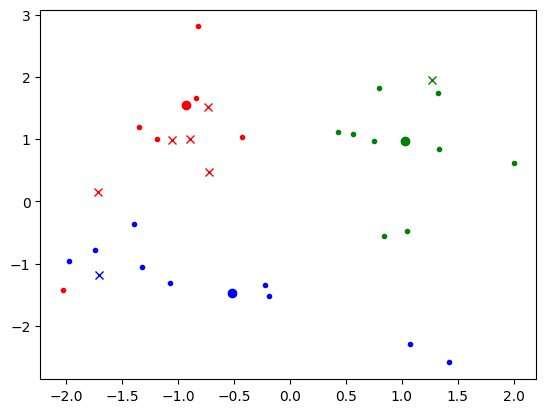

In [6]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

In [7]:
y

array([0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 1, 0])

## Post-test

Pada post-test kali ini, teman-teman akan menggunakan Hand-written MNIST. Teman-teman harus bisa membangun model LVQ yang mampu mengklasifikasikan citra tulisan tangan ke bentuk sebenarnya.

**Unduh dataset dari google drive**

In [8]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

Downloading...
From: https://drive.google.com/uc?id=1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA
To: /content/data.csv
100% 18.3M/18.3M [00:00<00:00, 76.5MB/s]


**Representasi file csv ke citra asli**

In [9]:
data = pd.read_csv('data.csv')
data.head(10)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Teman-teman pada kali ini hanya diminta untuk melakukan klasifikasi 2 kelas. Hapus semua baris yang tidak berlabel 5 dan 6!

In [10]:
# Hapus semua kelas, kecuali kelas 5 dan 6, simpan ke variabel data_lite
data_lite = data[data['label'].isin([5, 6])]


data_lite.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
8       5    0    0    0    0    0    0    0    0    0  ...      0      0   
11      6    0    0    0    0    0    0    0    0    0  ...      0      0   
15      5    0    0    0    0    0    0    0    0    0  ...      0      0   
21      6    0    0    0    0    0    0    0    0    0  ...      0      0   
22      6    0    0    0    0    0    0    0    0    0  ...      0      0   
23      5    0    0    0    0    0    0    0    0    0  ...      0      0   
45      5    0    0    0    0    0    0    0    0    0  ...      0      0   
50      6    0    0    0    0    0    0    0    0    0  ...      0      0   
52      5    0    0    0    0    0    0    0    0    0  ...      0      0   
53      5    0    0    0    0    0    0    0    0    0  ...      0      0   
54      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59      5    0    0    0    0    0    0    0    0    0  ...      0      0   

<ipython-input-11-ed0206ec44ef>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kelas = row[0]  # Kolom pertama adalah nama kelas


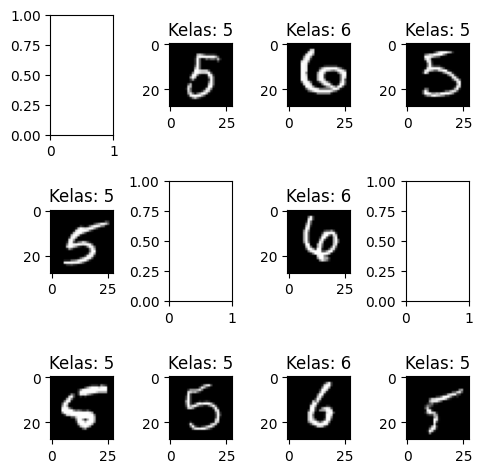

In [11]:
selected = data_lite.iloc[:12]
print(selected)

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index % baris
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

Lakukan pelatihan menggunakan X_train dan uji dengan X_test. Set parameter lainnya agar teman-teman mendapatkan akurasi > 0,9.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #jangan ubah baris ini


model = lvq_fit(X_train, y_train, lrate=0.05, b=0.6, max_epoch=190)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
print('Accuracy:', accuracy)

Accuracy: 1.0


### Pertanyaan

1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!
2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

Jawaban

1.  Arsitektur LVQ sangat bergantung pada data pelatihan yang digunakan. Jumlah neuron input dan output menyesuaikan dengan jumlah label yang ada pada data target. Jumlah neuron input sama dengan jumlah fitur pada dataset pelatihan (pada contoh ini sebanyak 28 x 28 = 784), sedangkan jumlah neuron output sama dengan jumlah label yang akan diklasifikasikan dalam data (dalam hal ini terdapat 2 label, yaitu 5 dan 6).
2.  Penyetelan parameter dilakukan secara coba-coba (trial and error) untuk mencapai akurasi tertinggi. Pada contoh ini, digunakan nilai lrate=0.05, b=0.6, dan max_epoch=190. Namun, perlu dicatat bahwa karena data pelatihan dan pengujian diacak pada setiap kali eksekusi, hasil akurasi dapat berbeda setiap kali kode dijalankan, sehingga hasil akurasi mungkin tidak selalu sama.